In [1]:
import os
from chemwalker.gnps import Proteosafe
from chemwalker.utils import run_metfrag, walk_conn_comp, get_db
from chemwalker.draw import *
import pandas as pd
import numpy as np

In [2]:
taskid = 'b6d12e1e42b64ad6b20e7d38d5a4214b'

gnps_result = Proteosafe(taskid, 'FBMN-gnps2')
gnps_result.get_gnps()
net = gnps_result.net
gnps_tab = gnps_result.gnps
spectra = gnps_result.spectra
match_tab = gnps_result.dbmatch

In [3]:
net.shape

(580, 5)

In [4]:
net['ComponentIndex'].value_counts().to_dict()

{2: 226,
 6: 88,
 1: 76,
 3: 52,
 21: 21,
 11: 21,
 13: 13,
 29: 12,
 14: 12,
 4: 11,
 19: 10,
 24: 6,
 18: 6,
 9: 6,
 12: 3,
 28: 3,
 7: 3,
 23: 2,
 27: 2,
 17: 1,
 10: 1,
 34: 1,
 35: 1,
 39: 1,
 42: 1,
 44: 1}

In [5]:
nset = net['ComponentIndex'].unique().tolist()
nset

[1,
 2,
 3,
 4,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 17,
 18,
 19,
 21,
 23,
 24,
 27,
 28,
 29,
 34,
 35,
 39,
 42,
 44]

In [6]:
match_tab.head()

,SpectrumID,Compound_Name,Ion_Source,Instrument,Compound_Source,PI,Data_Collector,Adduct,Precursor_MZ,ExactMass,...,MoleculeExplorerFiles,molecular_formula,InChIKey,InChIKey-Planar,superclass,class,subclass,npclassifier_superclass,npclassifier_class,npclassifier_pathway
0,CCMSLIB00011427969,HOMOORIENTIN(ISOORIENTIN),ESI,Orbitrap,Commercial,Cech,Vicky Anderson,M+H,449.108,448.101,...,0,C21H20O11,ODBRNZZJSYPIDI-UHFFFAOYSA-N,ODBRNZZJSYPIDI,Phenylpropanoids and polyketides,Flavonoids,Flavonoid glycosides,Flavonoids,Flavones,Shikimates and Phenylpropanoids
1,CCMSLIB00011427969,HOMOORIENTIN(ISOORIENTIN),ESI,Orbitrap,Commercial,Cech,Vicky Anderson,M+H,449.108,448.101,...,0,C21H20O11,ODBRNZZJSYPIDI-UHFFFAOYSA-N,ODBRNZZJSYPIDI,Phenylpropanoids and polyketides,Flavonoids,Flavonoid glycosides,Flavonoids,Flavones,Shikimates and Phenylpropanoids
5,CCMSLIB00006674103,Caffeic_acid_4B_Glucuronide,ESI,Orbitrap,Commercial,Ulaszewska,Marynka Ulaszewska,M+H,357.082,356.074,...,0,C15H16O10,LTGOIJNQWZWJRF-UHFFFAOYSA-N,LTGOIJNQWZWJRF,Organic oxygen compounds,Organooxygen compounds,Carbohydrates and carbohydrate conjugates,Phenylpropanoids (C6-C3),Cinnamic acids and derivatives,Shikimates and Phenylpropanoids
6,CCMSLIB00006117022,Cortisol - 30.0 eV,ESI,Orbitrap,Isolated,PI,Data Collector,M+H,363.217,0.000,...,0,C21H30O5,JYGXADMDTFJGBT-VWUMJDOOSA-N,JYGXADMDTFJGBT,Lipids and lipid-like molecules,Steroids and steroid derivatives,Hydroxysteroids,Steroids,Pregnane steroids,Terpenoids
7,CCMSLIB00006119745,Chlorogenic acid - 40.0 eV,ESI,Orbitrap,Isolated,PI,Data Collector,M+H,355.103,0.000,...,0,C16H18O9,CWVRJTMFETXNAD-JUHZACGLSA-N,CWVRJTMFETXNAD,Organic oxygen compounds,Organooxygen compounds,Alcohols and polyols,Phenylpropanoids (C6-C3),Cinnamic acids and derivatives,Shikimates and Phenylpropanoids


In [7]:
match_tab.columns

Index(['SpectrumID', 'Compound_Name', 'Ion_Source', 'Instrument',
       'Compound_Source', 'PI', 'Data_Collector', 'Adduct', 'Precursor_MZ',
       'ExactMass', 'Charge', 'CAS_Number', 'Pubmed_ID', 'Smiles', 'INCHI',
       'INCHI_AUX', 'Library_Class', 'IonMode', 'UpdateWorkflowName',
       'LibraryQualityString', '#Scan#', 'SpectrumFile', 'LibraryName',
       'MQScore', 'Organism', 'TIC_Query', 'RT_Query', 'MZErrorPPM',
       'SharedPeaks', 'MassDiff', 'LibMZ', 'SpecMZ', 'SpecCharge',
       'FileScanUniqueID', 'NumberHits', 'tags', 'MoleculeExplorerDatasets',
       'MoleculeExplorerFiles', 'molecular_formula', 'InChIKey',
       'InChIKey-Planar', 'superclass', 'class', 'subclass',
       'npclassifier_superclass', 'npclassifier_class',
       'npclassifier_pathway'],
      dtype='object')

In [8]:
gnps_tab.head()

,cluster index,parent mass,RTMean,ATTRIBUTE_Sample_Number:GNPSGROUP:10,ATTRIBUTE_Sample_Number:GNPSGROUP:11,ATTRIBUTE_Sample_Number:GNPSGROUP:12,ATTRIBUTE_Sample_Number:GNPSGROUP:78,ATTRIBUTE_Sample_Number:GNPSGROUP:79,ATTRIBUTE_Sample_Number:GNPSGROUP:80,ATTRIBUTE_Sample_Number:GNPSGROUP:152,...,ATTRIBUTE_Asat:GNPSGROUP:24.941,ATTRIBUTE_C:GNPSGROUP:14.155,ATTRIBUTE_C:GNPSGROUP:20.231,ATTRIBUTE_C:GNPSGROUP:22.241,ATTRIBUTE_C:GNPSGROUP:18.426,ATTRIBUTE_N:GNPSGROUP:nan,ATTRIBUTE_C/N:GNPSGROUP:nan,component,#Scan#,Compound_Name
0,5,353.265401,35.119569,860049.175,1.281668e+06,1.099282e+06,1631616.110,1.441528e+06,1254956.950,900838.985,...,8.953386e+05,1.080333e+06,1.442700e+06,1.076078e+06,8.953386e+05,NaN,NaN,-1,NaN,NaN
1,7,381.296298,37.262528,915588.990,1.249140e+06,9.998174e+05,1445426.520,1.270731e+06,1234167.890,800190.520,...,8.610748e+05,1.054849e+06,1.316775e+06,1.016424e+06,8.610748e+05,NaN,NaN,2,NaN,NaN
2,8,581.148154,7.884651,1779064.237,5.228738e+06,1.348523e+06,1536205.639,2.423437e+04,127515.698,36034.871,...,5.938552e+05,2.785442e+06,5.626519e+05,1.093534e+05,5.938552e+05,NaN,NaN,3,8.0,Isoshaftoside
6,10,609.268397,35.247439,1900706.545,1.099087e+06,5.505347e+05,1259964.695,3.167505e+05,525107.070,325802.580,...,1.782752e+06,1.183443e+06,7.006074e+05,4.647201e+05,1.782752e+06,NaN,NaN,1,10.0,3.10S-Hydroxypheophorbide a
7,13,305.156498,49.782424,559341.440,8.127709e+05,6.643086e+05,299720.325,4.172964e+05,714114.810,683273.360,...,2.644902e+05,6.788070e+05,4.770438e+05,7.642802e+05,2.644902e+05,NaN,NaN,2,NaN,NaN


In [9]:
spectra[0]

{'params': {'pepmass': (353.2654, None),
  'rtinseconds': 2107.174 second,
  'charge': [1],
  'feature_id': '5',
  'scans': '5',
  'mslevel': '2'},
 'm/z array': array([353.2602, 354.2637, 355.2699, 400.2479]),
 'intensity array': array([2000.,  590.,   74.,   62.]),
 'charge array': masked_array(data=[--, --, --, --],
              mask=[ True,  True,  True,  True],
        fill_value=0,
             dtype=int64)}

In [10]:
gnps_result.check_comp(11)

Component of 8 nodes, with 1 InChI or Smiles present.


In [11]:
db = get_db()
db.head()

,MonoisotopicMass,InChI,SMILES,Identifier,InChIKey2,InChIKey1,MolecularFormula,kingdom_name,superclass_name,class_name,subclass_name
0,194.05791,InChI=1/C10H10O4/c1-14-9-6-7(2-4-8(9)11)3-5-10...,COC1=C(C=CC(=C1)C=CC(=O)O)O,CCMSLIB00000220714,UHFFFAOYSA,KSEBMYQBYZTDHS,C10H10O4,Organic compounds,Phenylpropanoids and polyketides,Cinnamic acids and derivatives,Hydroxycinnamic acids and derivatives
1,176.09496,InChI=1/C10H12N2O/c11-4-3-7-6-12-10-2-1-8(13)5...,C1=CC2=C(C=C1O)C(=CN2)CCN,CCMSLIB00000220735,UHFFFAOYSA,QZAYGJVTTNCVMB,C10H12N2O,Organic compounds,Organoheterocyclic compounds,Indoles and derivatives,Tryptamines and derivatives
2,176.04734,InChI=1/C10H8O3/c1-6-4-10(12)13-9-5-7(11)2-3-8...,CC1=CC(=O)OC2=C1C=CC(=C2)O,CCMSLIB00000221773,UHFFFAOYSA,HSHNITRMYYLLCV,C10H8O3,NaN,NaN,NaN,NaN
3,345.07864,"InChI=1/C12H17N4O4PS/c1-8-11(3-4-20-21(17,18)1...",CC1=C(SC=[N+]1CC2=CN=C(N=C2N)C)CCOP(=O)(O)O,CCMSLIB00000221098,UHFFFAOYSA,HZSAJDVWZRBGIF,C12H18N4O4PS,Organic compounds,Organoheterocyclic compounds,Diazines,Pyrimidines and pyrimidine derivatives
4,342.11621,InChI=1/C12H22O11/c13-1-4-6(15)8(17)9(18)11(22...,C(C1C(C(C(C(O1)OCC2C(C(C(O2)(CO)O)O)O)O)O)O)O,CCMSLIB00000222747,UHFFFAOYSA,PVXPPJIGRGXGCY,C12H22O11,NaN,NaN,NaN,NaN


In [12]:
db.head()

,MonoisotopicMass,InChI,SMILES,Identifier,InChIKey2,InChIKey1,MolecularFormula,kingdom_name,superclass_name,class_name,subclass_name
0,194.05791,InChI=1/C10H10O4/c1-14-9-6-7(2-4-8(9)11)3-5-10...,COC1=C(C=CC(=C1)C=CC(=O)O)O,CCMSLIB00000220714,UHFFFAOYSA,KSEBMYQBYZTDHS,C10H10O4,Organic compounds,Phenylpropanoids and polyketides,Cinnamic acids and derivatives,Hydroxycinnamic acids and derivatives
1,176.09496,InChI=1/C10H12N2O/c11-4-3-7-6-12-10-2-1-8(13)5...,C1=CC2=C(C=C1O)C(=CN2)CCN,CCMSLIB00000220735,UHFFFAOYSA,QZAYGJVTTNCVMB,C10H12N2O,Organic compounds,Organoheterocyclic compounds,Indoles and derivatives,Tryptamines and derivatives
2,176.04734,InChI=1/C10H8O3/c1-6-4-10(12)13-9-5-7(11)2-3-8...,CC1=CC(=O)OC2=C1C=CC(=C2)O,CCMSLIB00000221773,UHFFFAOYSA,HSHNITRMYYLLCV,C10H8O3,NaN,NaN,NaN,NaN
3,345.07864,"InChI=1/C12H17N4O4PS/c1-8-11(3-4-20-21(17,18)1...",CC1=C(SC=[N+]1CC2=CN=C(N=C2N)C)CCOP(=O)(O)O,CCMSLIB00000221098,UHFFFAOYSA,HZSAJDVWZRBGIF,C12H18N4O4PS,Organic compounds,Organoheterocyclic compounds,Diazines,Pyrimidines and pyrimidine derivatives
4,342.11621,InChI=1/C12H22O11/c13-1-4-6(15)8(17)9(18)11(22...,C(C1C(C(C(C(O1)OCC2C(C(C(O2)(CO)O)O)O)O)O)O)O,CCMSLIB00000222747,UHFFFAOYSA,PVXPPJIGRGXGCY,C12H22O11,NaN,NaN,NaN,NaN


In [20]:
# https://ipb-halle.github.io/MetFrag/projects/metfragcl/
metpath = os.path.abspath('MetFrag2.3-CL.jar')
metpath

'/home/rsilva/Documents/ChemWalker/notebooks/MetFrag2.3-CL.jar'

In [14]:
from chemwalker.utils import *

In [15]:
gnps_tab.shape

(486, 78)

In [16]:
len(spectra)

486

In [17]:
gnps_tab.head()

,cluster index,parent mass,RTMean,ATTRIBUTE_Sample_Number:GNPSGROUP:10,ATTRIBUTE_Sample_Number:GNPSGROUP:11,ATTRIBUTE_Sample_Number:GNPSGROUP:12,ATTRIBUTE_Sample_Number:GNPSGROUP:78,ATTRIBUTE_Sample_Number:GNPSGROUP:79,ATTRIBUTE_Sample_Number:GNPSGROUP:80,ATTRIBUTE_Sample_Number:GNPSGROUP:152,...,ATTRIBUTE_Asat:GNPSGROUP:24.941,ATTRIBUTE_C:GNPSGROUP:14.155,ATTRIBUTE_C:GNPSGROUP:20.231,ATTRIBUTE_C:GNPSGROUP:22.241,ATTRIBUTE_C:GNPSGROUP:18.426,ATTRIBUTE_N:GNPSGROUP:nan,ATTRIBUTE_C/N:GNPSGROUP:nan,component,#Scan#,Compound_Name
0,5,353.265401,35.119569,860049.175,1.281668e+06,1.099282e+06,1631616.110,1.441528e+06,1254956.950,900838.985,...,8.953386e+05,1.080333e+06,1.442700e+06,1.076078e+06,8.953386e+05,NaN,NaN,-1,NaN,NaN
1,7,381.296298,37.262528,915588.990,1.249140e+06,9.998174e+05,1445426.520,1.270731e+06,1234167.890,800190.520,...,8.610748e+05,1.054849e+06,1.316775e+06,1.016424e+06,8.610748e+05,NaN,NaN,2,NaN,NaN
2,8,581.148154,7.884651,1779064.237,5.228738e+06,1.348523e+06,1536205.639,2.423437e+04,127515.698,36034.871,...,5.938552e+05,2.785442e+06,5.626519e+05,1.093534e+05,5.938552e+05,NaN,NaN,3,8.0,Isoshaftoside
6,10,609.268397,35.247439,1900706.545,1.099087e+06,5.505347e+05,1259964.695,3.167505e+05,525107.070,325802.580,...,1.782752e+06,1.183443e+06,7.006074e+05,4.647201e+05,1.782752e+06,NaN,NaN,1,10.0,3.10S-Hydroxypheophorbide a
7,13,305.156498,49.782424,559341.440,8.127709e+05,6.643086e+05,299720.325,4.172964e+05,714114.810,683273.360,...,2.644902e+05,6.788070e+05,4.770438e+05,7.642802e+05,2.644902e+05,NaN,NaN,2,NaN,NaN


In [18]:
run_metfrag(spectra[0], db, cluster_index=5, **{'metpath': metpath})

INFO  de.ipbhalle.metfraglib.process.CombinedMetFragProcess - Got 54 candidate(s)
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 10 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 20 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 30 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 40 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 50 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 60 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 70 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 80 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 90 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 100 %
INFO  de.ipbhalle.metfraglib.process.CombinedMetFragProcess - 0 candidate(s) were discarded before processing due to pre-filtering
INFO  de.ipbhalle.metfraglib.process.CombinedMetFragProcess - 0 candidate(s) discarded during processing due to errors
INFO  de.ipbhalle.metfraglib.process.CombinedMetFragProce

,Score,InChI,FragmenterScore_Values,MaximumTreeDepth,SmilesOfExplPeaks,MonoisotopicMass,Identifier,MolecularFormula,FormulasOfExplPeaks,InChIKey2,InChIKey1,FragmenterScore,ExplPeaks,NoExplPeaks,NumberPeaksUsed,cluster index
0,0.0,InChI=1S/C21H36O4/c1-2-3-4-5-6-7-8-9-10-11-12-...,NaN,2,NaN,352.26136,HMDB11570,C21H36O4,NaN,IWFQAGGASA,GGJRAQULURVTAJ,0.0,NaN,0,0,5
1,0.0,InChI=1S/C21H36O4/c1-2-3-4-5-6-7-8-9-10-11-12-...,NaN,2,NaN,352.26136,HMDB11569,C21H36O4,NaN,FFXVNFNPSA,XQBHBEXBUZDCRY,0.0,NaN,0,0,5
2,0.0,InChI=1S/C21H36O4/c1-2-3-4-5-6-7-8-9-10-11-12-...,NaN,2,NaN,352.26136,HMDB11540,C21H36O4,NaN,PDBXOOCHSA,ZCCLDKGWJIREQF,0.0,NaN,0,0,5
3,0.0,InChI=1S/C21H36O4/c1-2-3-4-5-6-7-8-9-10-11-12-...,NaN,2,NaN,352.26136,HMDB11539,C21H36O4,NaN,QNEBEIHSSA,BXAXVVVVPFELOK,0.0,NaN,0,0,5
4,0.0,InChI=1S/C17H30N6O2/c1-21(2)9-14-10-23(20-19-1...,NaN,2,NaN,352.25867,SN00003763,C17H32N6O2+2,NaN,IMJJTQAJSA,ARTRYHKUYFBLMW,0.0,NaN,0,0,5
5,0.0,InChI=1S/C21H36O4/c1-12(2)14-8-7-13(3)17-15-11...,NaN,2,NaN,352.26136,SN00336671,C21H36O4,NaN,FQOJGSFKSA,OEUGMHUKLQIMAL,0.0,NaN,0,0,5
6,0.0,InChI=1S/C21H36O4/c1-12(22)15-7-9-21(25)16-5-4...,NaN,2,NaN,352.26136,SN00314125,C21H36O4,NaN,ISKWUEMLSA,FTIPFRDCMUGVRU,0.0,NaN,0,0,5
7,0.0,InChI=1S/C21H36O4/c1-12(22)21(25)9-7-16-15-5-4...,NaN,2,NaN,352.26136,SN00365925,C21H36O4,NaN,HHDQNTOOSA,ICLJUDISOCRJDM,0.0,NaN,0,0,5
8,0.0,InChI=1S/C21H36O4/c1-13(11-18(23)25-6)7-9-20(4...,NaN,2,NaN,352.26136,SN00257279,C21H36O4,NaN,FCFMDSSISA,QFSPHXMKLQWTLA,0.0,NaN,0,0,5
9,0.0,InChI=1S/C21H36O4/c1-14(10-13-25-6)8-9-15-20(4...,NaN,2,NaN,352.26136,SN00267497,C21H36O4,NaN,GPLUPSNSSA,KOMLQPBMYPUDGX,0.0,NaN,0,0,5


In [21]:
%%time

tlid = walk_conn_comp(net=net, spectra=spectra, tabgnps=gnps_tab, 
                      dbmatch=match_tab.copy(), db=db, comp_index=11,
                      metpath=metpath)

Component with 8 nodes
Calculating in silico fragmentation with MetFrag...


INFO  de.ipbhalle.metfraglib.process.CombinedMetFragProcess - Got 10 candidate(s)
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 10 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 20 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 30 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 40 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 50 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 60 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 70 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 80 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 90 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 100 %
INFO  de.ipbhalle.metfraglib.process.CombinedMetFragProcess - Processed 9 candidate(s)
INFO  de.ipbhalle.metfraglib.process.CombinedMetFragProcess - 1 candidate(s) were discarded before processing due to pre-filtering
INFO  de.ipbhalle.metfraglib.process.CombinedMetFragProcess - 0 candidate(s) discarded du

in silico fragmentation done in: 34.9162483215332 seconds
Calculating pairwise candidate similarities...
similarities done in: 1.5441513061523438 seconds
Seed - InChIKey1:NSUHFZHIKMSXME, cluster index:2816, Identifier:CCMSLIB00005723380
Walking on the graph...
walking done in: 0.001987457275390625 seconds
CPU times: user 1.03 s, sys: 556 ms, total: 1.58 s
Wall time: 36.6 s


In [23]:
net[net['ComponentIndex']==11]

,CLUSTERID1,CLUSTERID2,ComponentIndex,Cosine,DeltaMZ
463,49,658,11,0.8001,124.073
464,162,658,11,0.8738,146.059
465,184,658,11,0.8559,33.955
466,658,682,11,0.8773,15.995
467,658,1428,11,0.8220,292.131
468,658,2782,11,0.8077,-124.021
469,658,2816,11,0.8620,16.038
470,49,2782,11,0.9658,0.053
471,162,2782,11,0.9158,22.038
472,184,2782,11,0.9075,-90.065


26    InChI=1S/C43H72O14/c1-22(19-44)10-9-15-42(7,52...
25    InChI=1S/C43H72O14/c1-22(19-44)10-9-15-42(7,52...
28    InChI=1/C43H72O14/c1-21(9-10-28(47)39(5,6)52)2...
27    InChI=1S/C43H72O14/c1-21-29(48)34(57-36-32(51)...
30    InChI=1S/C43H72O14/c1-20(10-11-28(39(6,7)52)56...
29    InChI=1S/C43H72O14/c1-38(2)11-13-43(20-54-37-3...
31    InChI=1S/C43H72O14/c1-21(44)54-32-24(47)20-53-...
32    InChI=1S/C43H72O14/c1-21(44)54-32-30(49)24(47)...
37    InChI=1S/C43H72O14/c1-20(2)16-25(54-38-35(51)3...
33    InChI=1/C47H72O11/c1-2-38(48)34-35-43(53)32-23...
35    InChI=1S/C47H72O11/c1-2-38(48)32-33-42(52)28-2...
34    InChI=1S/C47H72O11/c1-2-38(48)32-33-42(52)28-2...
36    InChI=1S/C47H72O11/c1-2-38(48)34-35-43(53)30-2...
Name: InChI, dtype: object


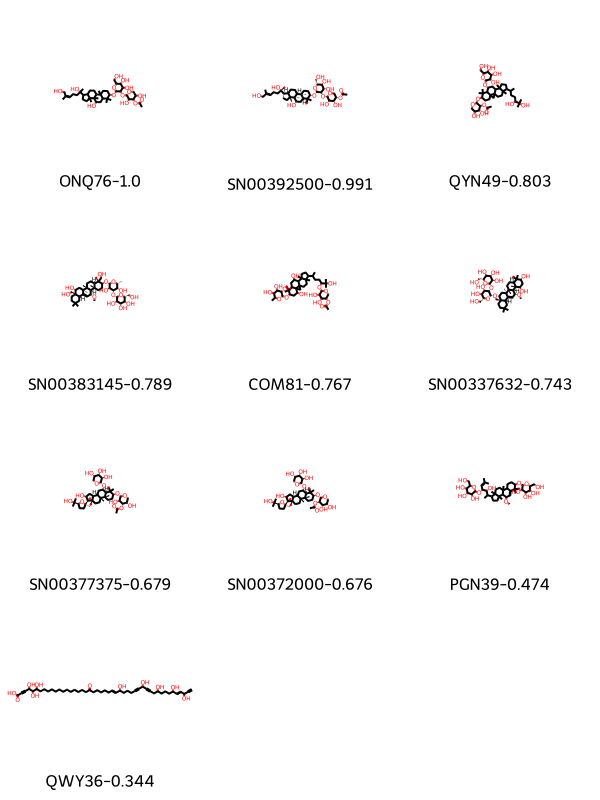

In [25]:
plotPannel(tlid, clusterid=658)

25    InChI=1S/C43H72O14/c1-22(19-44)10-9-15-42(7,52...
26    InChI=1S/C43H72O14/c1-22(19-44)10-9-15-42(7,52...
27    InChI=1S/C43H72O14/c1-21-29(48)34(57-36-32(51)...
28    InChI=1/C43H72O14/c1-21(9-10-28(47)39(5,6)52)2...
29    InChI=1S/C43H72O14/c1-38(2)11-13-43(20-54-37-3...
30    InChI=1S/C43H72O14/c1-20(10-11-28(39(6,7)52)56...
31    InChI=1S/C43H72O14/c1-21(44)54-32-24(47)20-53-...
32    InChI=1S/C43H72O14/c1-21(44)54-32-30(49)24(47)...
33    InChI=1/C47H72O11/c1-2-38(48)34-35-43(53)32-23...
34    InChI=1S/C47H72O11/c1-2-38(48)32-33-42(52)28-2...
35    InChI=1S/C47H72O11/c1-2-38(48)32-33-42(52)28-2...
36    InChI=1S/C47H72O11/c1-2-38(48)34-35-43(53)30-2...
37    InChI=1S/C43H72O14/c1-20(2)16-25(54-38-35(51)3...
Name: InChI, dtype: object


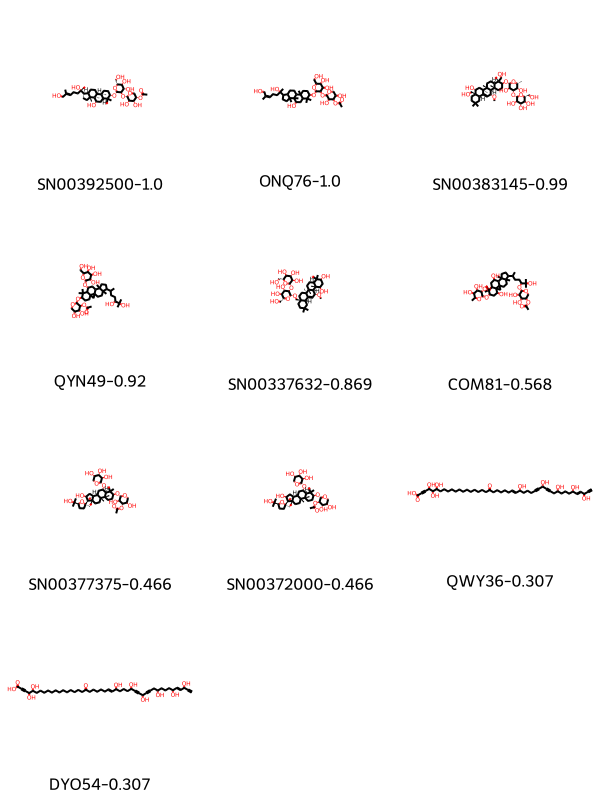

In [26]:
plotPannel(tlid, clusterid=658, score='Score')

In [27]:
if not os.path.exists('figs'):
    os.mkdir('figs')

plotGraph(match_tab, gnps_tab, tlid, net, method='MF',
         dr='figs', comp=11, option=1, pos_scale=300)
    
plotGraph(match_tab, gnps_tab, tlid, net, method='RW',
         dr='figs', comp=11, option=1, pos_scale=300)

ValueError: cannot reindex on an axis with duplicate labels

In [28]:
tlid['cluster index'].value_counts()

cluster index
1428    23
682     14
658     13
162      9
184      4
49       2
2782     1
2816     1
Name: count, dtype: int64

In [27]:
!zip -r res_chw.zip figs/ comp_11_MF.html comp_11_RW.html

  adding: figs/ (stored 0%)
  adding: figs/RW_3007.png (deflated 7%)
  adding: figs/MF_1108.png (deflated 4%)
  adding: figs/RW_1108.png (deflated 4%)
  adding: figs/MF_307.png (deflated 5%)
  adding: figs/MF_3007.png (deflated 7%)
  adding: figs/RW_112.png (deflated 4%)
  adding: figs/MF_1076.png (deflated 4%)
  adding: figs/RW_830.png (deflated 4%)
  adding: figs/MF_830.png (deflated 4%)
  adding: figs/RW_387.png (deflated 4%)
  adding: figs/MF_387.png (deflated 4%)
  adding: figs/LM_1647.png (deflated 4%)
  adding: figs/RW_307.png (deflated 4%)
  adding: figs/MF_112.png (deflated 5%)
  adding: figs/LM_1412.png (deflated 4%)
  adding: figs/RW_1076.png (deflated 4%)
  adding: comp_10_MF.html (deflated 78%)
  adding: comp_10_RW.html (deflated 78%)


In [29]:
# export graphml
exportGraphml(tlid, net, 11, db, 'gnps2comp11fromjupyter')

In [32]:
db.to_csv('db.psv', index=None, sep='|')

In [31]:
!network_walk random-walk --help

/home/rsilva/miniconda3/envs/chemwalker/bin/network_walk:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').run_script('chemwalker==0.0.1', 'network_walk')
Usage: network_walk random-walk [OPTIONS]

Options:
  --taskid TEXT        GNPS task id
  --workflow TEXT      Workflow type, either FBMN or V2
  --comp INTEGER       Component (Molecular family) index
  --db TEXT            .psv Database file
  --metfragpath TEXT   .jar file of metfrag 2.3 command line
  --out TEXT           Output file name
  --savegraph INTEGER  Saves a graph with same file name
  --kw TEXT            Key word value arguments
  --help               Show this message and exit.


In [33]:
!network_walk random-walk --taskid b6d12e1e42b64ad6b20e7d38d5a4214b\
                          --workflow FBMN-gnps2\
                          --comp 11\
                          --db db.psv\
                          --metfragpath /home/rsilva/Documents/ChemWalker/notebooks/MetFrag2.3-CL.jar\
                          --out gnps2comp11ne

/home/rsilva/miniconda3/envs/chemwalker/bin/network_walk:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').run_script('chemwalker==0.0.1', 'network_walk')
Retrieving GNPS result...
Component with 8 nodes
Calculating in silico fragmentation with MetFrag...
INFO  de.ipbhalle.metfraglib.process.CombinedMetFragProcess - Got 10 candidate(s)
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 10 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 20 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 30 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 40 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 50 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 60 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 70 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 80 %
INFO  de.ipbhalle.metfraglib.process.ProcessingStatus - 90 %
INFO  de.ip